<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# Practice Project: Fruit Classification Using Transfer Learning 
**Estimated Time Needed:** 60 minutes


### Introduction 

In this practice project, you will learn to classify images of fruits into different categories using transfer learning. The pre-trained VGG16 model will be used as the base, and custom layers will be added to fine-tune the model for your specific task. This approach allows you to leverage the knowledge learned from a large data set (ImageNet) and apply it to a smaller, custom data set with minimal computational resources and data. 



### Aim 

The goal is to classify images of different fruits using a machine learning model. You will train a convolutional neural network (CNN) to recognize various fruit categories using the power of transfer learning with a pre-trained model. 


#### Final output 

A trained model capable of classifying fruit images into specified categories with good accuracy. 


### Learning objectives
At the end of the project, you will be able to:
- Prepare data into a directory structure
- Create sample images
- Verify the directory structure and images
- Set up the data generator
- Build and compile the model
- Train and evaluate the model using callbacks
- Plot and visualize the model


### Setup instructions 


#### Prerequisites 

- Basic knowledge of Python and Keras. 

- TensorFlow installed in your Python environment. 

- A data set of fruit images organized in subdirectories for each class. 


#### Required libraries 

Install the following libraries, if you haven't already: 


In [1]:
!pip install tensorflow
!pip install matplotlib
!pip install numpy
!pip install scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 MB 828.1 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 92.2 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 89.9 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 75.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 40.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 53.0 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 35.0 MB/s eta 0:00:0000:01:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 11.3 MB/s eta 0:00:

#### Importing required libraries 


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


2024-10-02 00:56:38.976262: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-02 00:56:38.978937: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-02 00:56:38.983215: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-02 00:56:38.994785: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-02 00:56:39.017540: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

### Data preparation 


#### Directory structure 

Ensure that your data set is organized as follows: 

 

data/ 

    ├── train/ 

    │   ├── apple/ 

    │   ├── banana/ 

    │   └── orange/ 

    └── val/ 

        ├── apple/ 

        ├── banana/ 

        └── orange/ 

 

Each subdirectory under train and val should contain images of the respective fruit category. 


### Step-by-step code to create folders and dummy images
**Create directory structure**

The following code creates the directory structure for training and validation data sets with subdirectories for each class.


In [3]:
import os
from PIL import Image
import numpy as np

# Define paths for the data set
base_dir = 'data'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

# Define class names
classes = ['apple', 'banana', 'orange']

# Function to create directories
def create_directory_structure(base_dir, class_names):
    for class_name in class_names:
        train_class_dir = os.path.join(train_dir, class_name)
        val_class_dir = os.path.join(val_dir, class_name)
        os.makedirs(train_class_dir, exist_ok=True)
        os.makedirs(val_class_dir, exist_ok=True)

# Create directory structure
create_directory_structure(base_dir, classes)
print(f"Directories created under {train_dir} and {val_dir} for classes {classes}")


Directories created under data/train and data/val for classes ['apple', 'banana', 'orange']


2. **Create sample images**
This code snippet generates a specified number of dummy images for each class in the training and validation directories.


In [4]:
# Function to create sample images
def create_sample_images(class_names, train_dir, val_dir, img_rows=150, img_cols=150, num_train=10, num_val=5):
    for class_name in class_names:
        for i in range(num_train):  # Create training images
            img = Image.fromarray(np.random.randint(0, 256, (img_rows, img_cols, 3), dtype='uint8'))
            img.save(os.path.join(train_dir, class_name, f'{class_name}_train_{i}.jpg'))

        for i in range(num_val):  # Create validation images
            img = Image.fromarray(np.random.randint(0, 256, (img_rows, img_cols, 3), dtype='uint8'))
            img.save(os.path.join(val_dir, class_name, f'{class_name}_val_{i}.jpg'))

# Create 10 training images and 5 validation images per class
create_sample_images(classes, train_dir, val_dir)
print("Sample images created for training and validation.")


Sample images created for training and validation.


**Verify the directory structure and images**

After creating the directories and dummy images, you can verify the directory structure and contents as follows:


In [5]:
# Function to print directory contents
def print_directory_structure(base_dir):
    for root, dirs, files in os.walk(base_dir):
        print(f"Root: {root}")
        print(f"Subdirectories: {dirs}")
        print(f"Files: {files}")
        print("-" * 30)

# Print the directory structure
print_directory_structure(base_dir)


Root: data
Subdirectories: ['train', 'val']
Files: []
------------------------------
Root: data/train
Subdirectories: ['apple', 'banana', 'orange']
Files: []
------------------------------
Root: data/train/apple
Subdirectories: []
Files: ['apple_train_0.jpg', 'apple_train_1.jpg', 'apple_train_2.jpg', 'apple_train_3.jpg', 'apple_train_4.jpg', 'apple_train_5.jpg', 'apple_train_6.jpg', 'apple_train_7.jpg', 'apple_train_8.jpg', 'apple_train_9.jpg']
------------------------------
Root: data/train/banana
Subdirectories: []
Files: ['banana_train_0.jpg', 'banana_train_1.jpg', 'banana_train_2.jpg', 'banana_train_3.jpg', 'banana_train_4.jpg', 'banana_train_5.jpg', 'banana_train_6.jpg', 'banana_train_7.jpg', 'banana_train_8.jpg', 'banana_train_9.jpg']
------------------------------
Root: data/train/orange
Subdirectories: []
Files: ['orange_train_0.jpg', 'orange_train_1.jpg', 'orange_train_2.jpg', 'orange_train_3.jpg', 'orange_train_4.jpg', 'orange_train_5.jpg', 'orange_train_6.jpg', 'orange_train

**Complete code to create folders, images, and print directory structure**
    
Combining the code snippets above into a complete solution:


In [6]:
import os
from PIL import Image
import numpy as np

# Define paths for the data set
base_dir = 'data'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

# Define class names
classes = ['apple', 'banana', 'orange']

# Function to create directories
def create_directory_structure(base_dir, class_names):
    for class_name in class_names:
        train_class_dir = os.path.join(train_dir, class_name)
        val_class_dir = os.path.join(val_dir, class_name)
        os.makedirs(train_class_dir, exist_ok=True)
        os.makedirs(val_class_dir, exist_ok=True)

# Create directory structure
create_directory_structure(base_dir, classes)
print(f"Directories created under {train_dir} and {val_dir} for classes {classes}")

# Function to create dummy images
def create_dummy_images(class_names, train_dir, val_dir, img_rows=150, img_cols=150, num_train=10, num_val=5):
    for class_name in class_names:
        for i in range(num_train):  # Create training images
            img = Image.fromarray(np.random.randint(0, 256, (img_rows, img_cols, 3), dtype='uint8'))
            img.save(os.path.join(train_dir, class_name, f'{class_name}_train_{i}.jpg'))

        for i in range(num_val):  # Create validation images
            img = Image.fromarray(np.random.randint(0, 256, (img_rows, img_cols, 3), dtype='uint8'))
            img.save(os.path.join(val_dir, class_name, f'{class_name}_val_{i}.jpg'))

# Create 10 training images and 5 validation images per class
create_dummy_images(classes, train_dir, val_dir)
print("Dummy images created for training and validation.")

# Function to print directory contents
def print_directory_structure(base_dir):
    for root, dirs, files in os.walk(base_dir):
        print(f"Root: {root}")
        print(f"Subdirectories: {dirs}")
        print(f"Files: {files}")
        print("-" * 30)

# Print the directory structure
print_directory_structure(base_dir)


Directories created under data/train and data/val for classes ['apple', 'banana', 'orange']
Dummy images created for training and validation.
Root: data
Subdirectories: ['train', 'val']
Files: []
------------------------------
Root: data/train
Subdirectories: ['apple', 'banana', 'orange']
Files: []
------------------------------
Root: data/train/apple
Subdirectories: []
Files: ['apple_train_0.jpg', 'apple_train_1.jpg', 'apple_train_2.jpg', 'apple_train_3.jpg', 'apple_train_4.jpg', 'apple_train_5.jpg', 'apple_train_6.jpg', 'apple_train_7.jpg', 'apple_train_8.jpg', 'apple_train_9.jpg']
------------------------------
Root: data/train/banana
Subdirectories: []
Files: ['banana_train_0.jpg', 'banana_train_1.jpg', 'banana_train_2.jpg', 'banana_train_3.jpg', 'banana_train_4.jpg', 'banana_train_5.jpg', 'banana_train_6.jpg', 'banana_train_7.jpg', 'banana_train_8.jpg', 'banana_train_9.jpg']
------------------------------
Root: data/train/orange
Subdirectories: []
Files: ['orange_train_0.jpg', 'or

#### Explanation:
**Directory creation:** create_directory_structure creates the necessary directories for training and validation data.

**Image creation:** create_sample_images generates sample images with random pixels for each class and saves them in the respective folders.

**Verification:** print_directory_structure prints the created directory structure and files for verification.

After running this code, you should have a data set directory structure with training and validation images, allowing you to proceed with the rest of the project.


#### Data generator setup 


In [7]:
# Define paths to training and validation directories
path_train = 'data/train'
path_val = 'data/val'

# Define image size and batch size
img_rows, img_cols = 150, 150
batch_size = 32
seed = 42

# Training data generator with augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Validation data generator without augmentation
val_datagen = ImageDataGenerator(
    rescale=1.0/255.0  # Normalize images, no augmentation for validation data
)

# Create the training generator
train_generator = train_datagen.flow_from_directory(
    directory=path_train,
    target_size=(img_rows, img_cols),
    batch_size=batch_size,
    class_mode='categorical',
    seed=seed
)

# Create the validation generator
val_generator = val_datagen.flow_from_directory(
    directory=path_val,
    target_size=(img_rows, img_cols),
    batch_size=batch_size,
    class_mode='categorical',
    seed=seed
)

# Check the number of images found
print(f"Training samples: {train_generator.samples} images belonging to {train_generator.num_classes} classes.")
print(f"Validation samples: {val_generator.samples} images belonging to {val_generator.num_classes} classes.")


Found 30 images belonging to 3 classes.
Found 15 images belonging to 3 classes.
Training samples: 30 images belonging to 3 classes.
Validation samples: 15 images belonging to 3 classes.


### Tasks List
To achieve the above objectives, you will complete the following tasks:

- Task 1: Print the version of TensorFlow
- Task 2: Create a test generator using the test_datagen object
- Task 3: Print the length of the train generator
- Task 4: Print the summary of the model
- Task 6: Plot accuracy curves for training and validation sets
- Task 7: Plot loss curves for training and validation sets (fine-tuned model)
- Task 8: Plot accuracy curves for training and validation sets (fine-tuned model)
- Task 9: Plot a test image using the Extract Features Model
- Task 10: Plot a test image using the Fine-Tuned Model


<h3>Task 1: Print the version of TensorFlow</h3>


This task ensures that TensorFlow is installed correctly and checks which version of TensorFlow is being used. It is a simple validation step to ensure compatibility with the rest of the code.


In [8]:
import tensorflow as tf
print(tf.__version__)

2.17.0


<h3>Task 2: Create a test generator using the test_datagen object</h3>


In this task, you use the `ImageDataGenerator` from Keras to create a test data generator. This object is responsible for loading images from the test dataset directory and preprocessing them. You rescale the images by a factor of 1/255 to normalize pixel values to the range [0, 1], which helps the model train more effectively.


In [9]:
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

test_generator = test_datagen.flow_from_directory(
    directory='data/train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    seed=42
)


Found 30 images belonging to 3 classes.


- **directory:** The path to the test dataset.

- **target_size:** The size to which all images will be resized (150x150 in this case).

- **batch_size:** Number of images processed in each batch.

- **class_mode:** In this case, it is 'categorical' since we have more than two classes (different fruits).
seed: Ensures reproducibility.


<h3>Task 3: Print the length of the train generator</h3>


This task prints the number of batches that will be generated by the training generator. Knowing the number of batches is useful when defining the `steps_per_epoch` parameter during training.


In [10]:
print(f"Number of training batches: {len(train_generator)}")

Number of training batches: 1


- **train_generator:** This is the object created using ImageDataGenerator for the training data. Each batch contains a set number of images.

- **len(train_generator):** Prints how many batches will be processed in each epoch of training.


<h3>Task 4: Print the summary of the model</h3>


In this task, you load the pre-trained VGG16 model (excluding its top fully-connected layers), add your custom layers, and print the model summary. The summary provides an overview of the model architecture, including layer types, output shapes, and the number of trainable parameters.


In [11]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

print(model.summary())


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,812,867 (64.14 MB)

 Trainable params: 16,812,867 (64.14 MB)

 Non-trainable params: 0 (0.00 B)

None


- **VGG16:** A pre-trained model on ImageNet, which is used as the base. You exclude the top layer (include_top=False) to customize it for your fruit classification task.                                                                                                                             
- **Sequential():** Used to build the model by stacking layers sequentially.

- **Flatten():** Converts the 2D matrix from the VGG16 model into a 1D vector.

- **Dense():** A fully connected layer. The output layer uses softmax activation because you are dealing with multiple fruit categories.

- **model.summary():** Prints the details of each layer in the model, including the number of parameters.


<h3>Task 5: Compile the model</h3>


This task compiles the model with appropriate loss functions, optimizers, and metrics. For a multi-class classification problem like this, you use the categorical_crossentropy loss function. The optimizer helps adjust the weights during training, and the metric chosen is accuracy to track the model's performance.


In [12]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


- **loss:** `categorical_crossentropy` is used for multi-class classification tasks.
- **optimizer:** `adam` is a popular optimization algorithm that adapts the learning rate for each parameter.
- **metrics:** `accuracy` to monitor model performance during training.


<h3>Task 6: Plot accuracy curves for training and validation sets</h3>


This task involves training the model and then plotting the accuracy curves for both the training and validation sets. Plotting these curves helps visualize how well the model is learning and whether there is any overfitting or underfitting.


Epoch 1/10


/opt/conda/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 27s 27s/step - accuracy: 0.3333 - loss: 2.5674 - val_accuracy: 0.3333 - val_loss: 16.5441
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 20s 20s/step - accuracy: 0.3667 - loss: 16.5816 - val_accuracy: 0.3333 - val_loss: 1.2380
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 19s 19s/step - accuracy: 0.3667 - loss: 1.1500 - val_accuracy: 0.3333 - val_loss: 1.1280
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 19s 19s/step - accuracy: 0.2667 - loss: 1.1646 - val_accuracy: 0.3333 - val_loss: 1.1052
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 20s 20s/step - accuracy: 0.3667 - loss: 1.1031 - val_accuracy: 0.3333 - val_loss: 1.0986
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 20s 20s/step - accuracy: 0.3333 - loss: 1.0984 - val_accuracy: 0.3333 - val_loss: 1.0986
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 20s 20s/step - accuracy: 0.3333 - loss: 1.0988 - val_accuracy: 0.3333 - val_loss: 1.0987
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 19s 19s/step - accuracy: 0.3333 - loss: 1.0983 - val_accuracy: 0.2667 - val_loss: 1.1005
Epoch 9/1

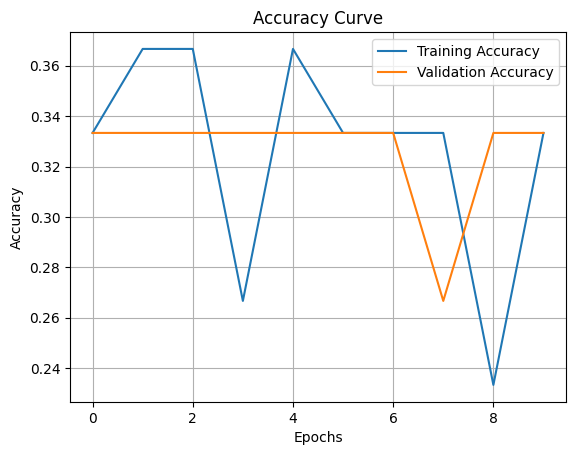

In [13]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


- **history:** The history object returned by `model.fit()` contains information about the training and validation accuracy for each epoch.

- **plt.plot():** Used to plot the accuracy for both training and validation sets over the epochs.

- **grid(True):** Adds a grid to the plot for better readability.


<h3>Task 7: Plot loss curves for training and validation sets (fine-tuned model)</h3>


After fine-tuning the model by unfreezing some layers of VGG16, you retrain it and plot the loss curves. This helps monitor how the loss decreases over time for both training and validation sets.


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step - accuracy: 0.3667 - loss: 3.1737 - val_accuracy: 0.3333 - val_loss: 1.0987
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 20s 20s/step - accuracy: 0.3333 - loss: 1.0986 - val_accuracy: 0.3333 - val_loss: 1.0987
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 19s 19s/step - accuracy: 0.3333 - loss: 1.0989 - val_accuracy: 0.3333 - val_loss: 1.0987
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 19s 19s/step - accuracy: 0.3333 - loss: 1.0986 - val_accuracy: 0.3333 - val_loss: 1.0987
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 19s 19s/step - accuracy: 0.3333 - loss: 1.0987 - val_accuracy: 0.3333 - val_loss: 1.0987
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 19s 19s/step - accuracy: 0.3333 - loss: 1.0987 - val_accuracy: 0.3333 - val_loss: 1.0987
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 19s 19s/step - accuracy: 0.3333 - loss: 1.0984 - val_accuracy: 0.3333 - val_loss: 1.0987
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 19s 19s/step - accuracy: 0.3333 - loss: 1.0990 - val_accuracy: 0.3333 - val_loss: 1.0987


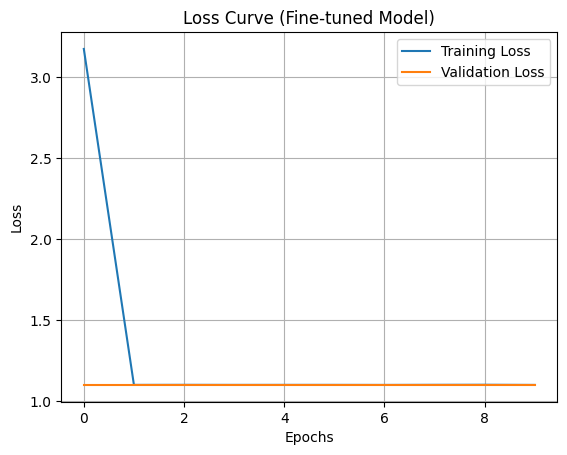

In [14]:
from tensorflow.keras import optimizers

for layer in base_model.layers[-4:]:
    layer.trainable = True

model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.RMSprop(learning_rate=1e-5),
    metrics=['accuracy']
)

history_fine_tune = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

plt.plot(history_fine_tune.history['loss'], label='Training Loss')
plt.plot(history_fine_tune.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve (Fine-tuned Model)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


- **fine-tuning:** Unfreezing the last few layers of the VGG16 model allows these layers to be trained on the new dataset.

- **loss curves:** Help visualize how the model's performance improves after fine-tuning.


<h3> Task 8: Plot accuracy curves for training and validation sets (fine-tuned model) </h3>


Similar to Task 7, this task plots the accuracy curves for the fine-tuned model, showing how well the model performs after unfreezing the last layers and retraining.


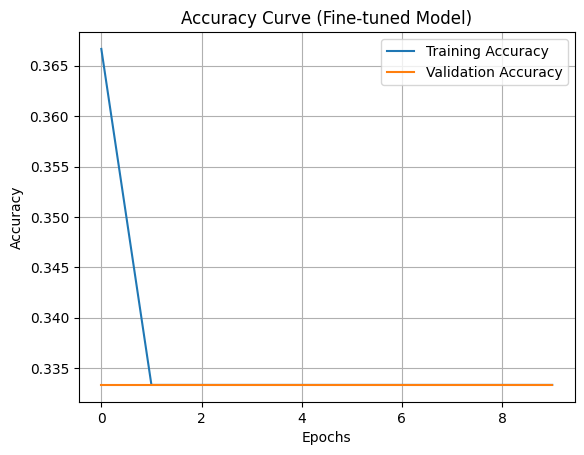

In [15]:
plt.plot(history_fine_tune.history['accuracy'], label='Training Accuracy')
plt.plot(history_fine_tune.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve (Fine-tuned Model)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


- **plt.plot():** Visualizes training and validation accuracy for the fine-tuned model.


<h3>Task 9: Plot a test image using the Extract Features Model</h3>


In this task, you evaluate the model on test data and plot a test image with its predicted label. This allows you to visually inspect how well the model performs on unseen data.


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


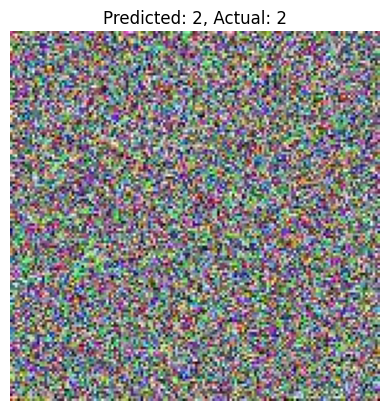

In [16]:
test_imgs, test_labels = next(test_generator)
predictions = model.predict(test_imgs)

plt.imshow(test_imgs[0])
plt.title(f"Predicted: {np.argmax(predictions[0])}, Actual: {np.argmax(test_labels[0])}")
plt.axis('off')
plt.show()


- **next(test_generator):** Loads a batch of images from the test generator.

- **model.predict():** Generates predictions for the test images.

- **plt.imshow():** Displays a test image along with the predicted and actual labels.


<h3>Task 10: Plot a test image using the Fine-Tuned Model</h3>


This task is similar to Task 9 but uses the fine-tuned model to predict and plot another test image.


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


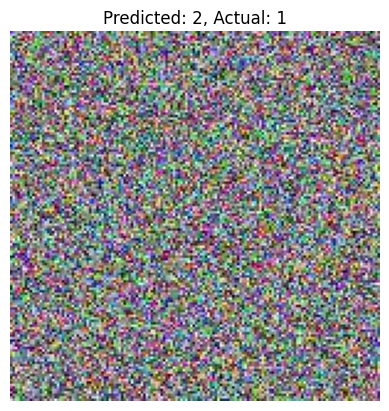

In [17]:
fine_tuned_predictions = model.predict(test_imgs)

plt.imshow(test_imgs[1])
plt.title(f"Predicted: {np.argmax(fine_tuned_predictions[1])}, Actual: {np.argmax(test_labels[1])}")
plt.axis('off')
plt.show()


- **fine_tuned_predictions:** Stores the predictions from the fine-tuned model for test data.

- **plt.imshow():** Displays the test image and shows how well the fine-tuned model predicts its label.


### Conclusion 


In this practice project, you successfully implemented a fruit classification model using transfer learning with the VGG16 model. You trained the model on a small data set of fruit images and evaluated its performance using accuracy and loss metrics. You also learned how to use data augmentation and various Keras callbacks to improve model training and performance. 


### Author

Skills Network


Copyright © IBM Corporation. All rights reserved.
